<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [5]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [9]:
# First, let's load the data.

file = 'job_listings.csv'
df = pd.read_csv(file, usecols=['title', 'description'])[['title', 'description']]
df.head()

,title,description
0,Data scientist,"b""<div><div>Job Requirements:</div><ul><li><p>..."
1,Data Scientist I,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...
2,Data Scientist - Entry Level,b'<div><p>As a Data Scientist you will be work...
3,Data Scientist,"b'<div class=""jobsearch-JobMetadataHeader icl-..."
4,Data Scientist,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...


In [10]:
from bs4 import BeautifulSoup

def clean_description(df):
    df = df.copy()
    df['description'] = df['description'].str.replace('b"', '')
    df['description'] = df['description'].str.replace("b'", '')
    df = df.applymap(lambda text: BeautifulSoup(text, 'html.parser').get_text())
    return df

df = clean_description(df)
df.head()

,title,description
0,Data scientist,Job Requirements:\nConceptual understanding in...
1,Data Scientist I,"Job Description\n\nAs a Data Scientist 1, you ..."
2,Data Scientist - Entry Level,As a Data Scientist you will be working on con...
3,Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener..."
4,Data Scientist,Location: USA \xe2\x80\x93 multiple locations\...


In [11]:
# We're going to use regex to remove the unicode.

def remove_unicode(df):
    df = df.copy()
    df['description'] = df['description'].str.replace(r'(\\(x|n)[a-z0-9]{0,2})', ' ')
    return df

df = remove_unicode(df)
df.head()

,title,description
0,Data scientist,Job Requirements: Conceptual understanding in ...
1,Data Scientist I,"Job Description As a Data Scientist 1, you wi..."
2,Data Scientist - Entry Level,As a Data Scientist you will be working on con...
3,Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener..."
4,Data Scientist,Location: USA multiple locations + years o...


In [14]:
# I'm going to check out a few of them to make sure everything is in order.

df.loc[10, 'description']

"Who We Are BlackThorn Therapeutics is a computational sciences company with capabilities to develop proprietary therapeutics focused on neurobehavioral disorders such as depression, schizophrenia, and autism. We have pioneered the development of a computational psychiatry platform to advance our robust pipeline of novel therapeutics. We leverage data-driven approaches to solve the patient selection problem to create treatments that improve patient outcomes.  The Position Help us create the next-gen AI technologies to make better decisions in end-to-end drug development, clinical trials, and deployment lifecycle. A successful candidate will develop and implement AI models and algorithms on large-scale, multimodal neuroimaging, physiological, and clinical datasets to deepen our understanding of neurobehavioral disorders and their treatment. You will work with scientists, clinical researchers, and software developers to implement solutions to support our data-driven approaches to improvi

In [16]:
df.loc[22, 'description']

"We are seeking a Data Scientist to join our Product Insights team, focusing on Personalization. We have several roles open across different levels of seniority.  You will be solving complex data problems and delivering the insight that helps to define our understanding of music, audio and our listeners to develop how we personalize at Spotify. This role works closely with a multidisciplinary team of data scientist, user researchers, data engineers, product teams and designers.  Your work will impact the way the world experiences music and audio!  What you   ll do: Develop research questions and undertake data exploration to understand who our listeners are, how they get value out of Spotify, and where we can develop our product to bring greater value Work closely with the team including data engineering to build lasting solutions to our data modeling Design, analyze, and interpret the results of experiments Perform exploratory analyses to understand the performance of our machine lear

## 2) Use Spacy to tokenize the listings 

In [17]:
# Let's define the stop words, omit data science.
nlp = spacy.load("en_core_web_lg")
stop_words = nlp.Defaults.stop_words.union(['data', 'science'])

# Tokenize it.
df['tokens'] = df['description'].apply(lambda x: [token.lemma_ for token in nlp(x) 
                                                  if (token not in stop_words)
                                                 and (token.is_punct !=True)])
df.sample(10)

,title,description,tokens
234,DATA SCIENTIST,NAUVERA INC looking for an entrepreneurial Dat...,"[NAUVERA, INC, look, for, an, entrepreneurial,..."
19,Data Analyst/Jr. Data Scientist,"$70,000 - $100,000 a yearTitle: Data Analyst/J...","[$, 70,000, $, 100,000, a, yeartitle, Data, An..."
169,Data Scientist,ABOUT THE ROLE Analytics works with numerous d...,"[about, the, ROLE, Analytics, work, with, nume..."
122,Senior Data Scientist,Senior Data Scientist-19000BN4 Preferred Qua...,"[senior, Data, scientist-19000bn4, , Preferr..."
283,"Data Scientist, AMP Analytics & Data Products","Summary Posted: Mar 15, 2019 Role Number: 2000...","[Summary, post, Mar, 15, 2019, Role, Number, 2..."
107,Data Scientist,HRS is looking to add a Data Scientist to our ...,"[HRS, be, look, to, add, a, Data, scientist, t..."
25,Measurement Data Scientist,As a Data Scientist for Ads Measurement in the...,"[as, a, Data, scientist, for, Ads, Measurement..."
22,Data Scientist – Personalization,We are seeking a Data Scientist to join our Pr...,"[-PRON-, be, seek, a, Data, scientist, to, joi..."
171,Data Scientist,The Atlantic is seeking a Data Scientist to he...,"[the, Atlantic, be, seek, a, Data, scientist, ..."
31,Data Scientist,We re looking for a Data Scientist in our gr...,"[-PRON-, , re, look, for, a, Data, scientist..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [18]:
count_vect = CountVectorizer()

dtm = count_vect.fit_transform(df['description'])
dtm_df = pd.DataFrame(dtm.todense(), columns=count_vect.get_feature_names())
dtm_df.head()

,00,000,02115,03,0356,04,05,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

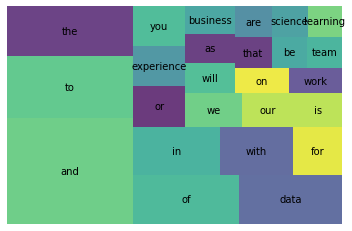

In [22]:
import squarify

word_ranks = dtm_df.sum().sort_values(ascending=False)
squarify.plot(sizes=word_ranks.values[:25], label=word_ranks.index[:25], alpha=0.8)
plt.axis('off')
plt.show();

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [23]:
# Instantiate vectorizor.

tfidf = TfidfVectorizer(stop_words = 'english')

dtm_tfidf = tfidf.fit_transform(df['description'])
dtm_tfidf_df = pd.DataFrame(dtm_tfidf.todense(), columns=tfidf.get_feature_names())

dtm_tfidf_df.head()

,00,000,02115,03,0356,04,05,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.106249,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [24]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM.
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm_tfidf_df)

# My ideal job description in Data Science.

job_desc = ["""
My ideal job would be working with the future of AI. Anything related to the improvement of what's known as narrow AI and
hopefully get to work in the actual construction of the first, true AGI machine. Even if I'm behind the research of this,
I would be extremely satisfied knowing that I was part of such a breakthrough in technology advancement.
"""]

In [25]:
query = tfidf.transform(job_desc)

In [26]:
query

<1x8476 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [27]:
# Use NN to find closest fit

nn.kneighbors(query.todense())

(array([[1.35535247, 1.35678167, 1.35773966, 1.35773966, 1.35936525]]),
 array([[286, 193,  50,  90, 121]]))

In [34]:
# Closest results.

df.loc[50]['description']

'Data Scientist (Multiple levels)-19000C1K   No Visa Sponsorship is available for this position.  Preferred Qualifications  Preferred Qualifications  Within the AI Apps team at Oracle we develop and deploy data science solutions at scale and throughout all of Oracle\'s existing products and services, and are seeking to grow the team with brilliant and diverse individuals with well-crafted technical ability. This is an exciting and challenging role that will stretch your knowledge and curiosity, offering the opportunity to learn new skills and work within an unusually talented, global community at Oracle.   You will encounter a wide variety of data types, from retail and financial transactions to free text, images and video. AI Apps are required to solve business challenges ranging from recommendation systems and dynamic discounting, management of the flow of goods and services, transportation logistics and movement and storage of materials and inventory, accounting and procurement, pro

In [35]:
df.loc[90]['description']

'Data Scientist (Multiple levels)-19000C1K   No Visa Sponsorship is available for this position.  Preferred Qualifications  Preferred Qualifications  Within the AI Apps team at Oracle we develop and deploy data science solutions at scale and throughout all of Oracle\'s existing products and services, and are seeking to grow the team with brilliant and diverse individuals with well-crafted technical ability. This is an exciting and challenging role that will stretch your knowledge and curiosity, offering the opportunity to learn new skills and work within an unusually talented, global community at Oracle.   You will encounter a wide variety of data types, from retail and financial transactions to free text, images and video. AI Apps are required to solve business challenges ranging from recommendation systems and dynamic discounting, management of the flow of goods and services, transportation logistics and movement and storage of materials and inventory, accounting and procurement, pro

In [36]:
df.loc[121]['description']

"Part-timeThe Nittany Artificial Intelligence (AI) Alliance at The Pennsylvania State University (PSU) is looking for a talented and highly motivated undergraduate intern to work on AI-related projects, gaining hands-on experience that enhances their learning at Penn State, while also gaining highly marketable development experience. Selected candidates will be members of a software development team and assist with the development of prototypes leveraging artificial intelligence and the design and configuration of cognitive modules within existing cognitive agents. We are looking for a Data Science intern to join our team beginning Summer 2019. As a Data Science Intern, you will collaborate with the other software development team members to do meaningful work while also growing your expertise. Strong consideration will be given to candidates who can present a successful project in machine learning that demonstrates the ability to create and train end-to-end solutions combining data pr

In [ ]:
# This is very accurate to the results I was looking for, pretty cool.

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 